# Problématique
Une société automobile chinoise Teclov_chinese aspire à entrer sur le marché américain en y installant son unité de fabrication et en produisant des voitures localement pour concurrencer leurs homologues américains et européens. Ils ont retenu les services d’une société d’experts-conseils en automobile pour comprendre les facteurs dont dépend le prix des voitures. Plus précisément, ils veulent comprendre les facteurs qui influent sur le prix des voitures sur le marché américain, car ils peuvent être très différents du marché chinois. Essentiellement, l’entreprise veut savoir : 
### Quelles variables sont importantes pour prédire le prix d’une voiture? 
### Dans quelle mesure ces variables décrivent-elles bien le prix d’une voiture?

### 1)Preparation et nettoyage des donnés 

#### importation des librairies nécessaires

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  r2_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

#### Importation des données 

In [3]:
df = pd.read_csv("dataset.csv")

#### Gerer les données manquantes 

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### Eliminer la variable car_id

In [5]:
df = df.drop(columns="car_ID")

#### entete de la dataset 

In [6]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Séparer et nettoyer la colonne Carname

In [7]:
Carcompany,Carmodel,a,b = [],[],"",""
for x in df["CarName"]:
	if len(x.split(" ",1))==1:
		a = x
		b = ""
	else:
		a,b = x.split(" ",1)
	Carcompany.append(a)
	Carmodel.append(b)
df["Carcompany"]=Carcompany
df["Carmodel"]=Carmodel
df["Carcompany"].value_counts()

df = df.replace(to_replace =["vokswagen","vw"], value ="volkswagen" )
df = df.replace(to_replace ="Nissan" , value ="nissan" )
df = df.replace(to_replace = "toyouta", value ="toyota" )
df = df.replace(to_replace = "porcshce", value = "porsche")
df = df.reindex(columns=["symboling", "CarName","Carcompany","Carmodel", "fueltype", "aspiration", "doornumber", "carbody","drivewheel", "enginelocation", "wheelbase", "carlength", "carwidth","carheight", "curbweight", "enginetype", "cylindernumber", "enginesize", "fuelsystem", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg","price","price_categorie"])


#### Creer une nouvelle variable de prix pour mieux visualiser les données aprés

In [8]:
r = []
for x in df["price"]:
	if x >18000:
		r.append("cher")
	elif x<18000 and x>10000:
		r.append("moyen")
	elif x<10000:
		r.append("abordable")
df["price_categorie"] = r


### 2)Compréhension et Exploration des données


#### La statistique descriptive des variables numériques

In [9]:
numerical_all = ["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg","price"]
df[numerical_all].describe()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Visualisation de la matrice de correlation

In [10]:
cor = df[numerical_all].corr()
cor.style.background_gradient(cmap='coolwarm').set_precision(2)


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.68
carwidth,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,0.59,0.49,0.28,1.00,0.30,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curbweight,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.84
enginesize,0.57,0.68,0.74,0.07,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,0.87
boreratio,0.49,0.61,0.56,0.17,0.65,0.58,1.00,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55
stroke,0.16,0.13,0.18,-0.06,0.17,0.20,-0.06,1.00,0.19,0.08,-0.07,-0.04,-0.04,0.08
compressionratio,0.25,0.16,0.18,0.26,0.15,0.03,0.01,0.19,1.00,-0.20,-0.44,0.32,0.27,0.07
horsepower,0.35,0.55,0.64,-0.11,0.75,0.81,0.57,0.08,-0.20,1.00,0.13,-0.80,-0.77,0.81


#### Visualisation de quelque variable corrélée avec le prix 

array([[<AxesSubplot:title={'center':'carwidth'}>,
        <AxesSubplot:title={'center':'enginesize'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'curbweight'}>]], dtype=object)

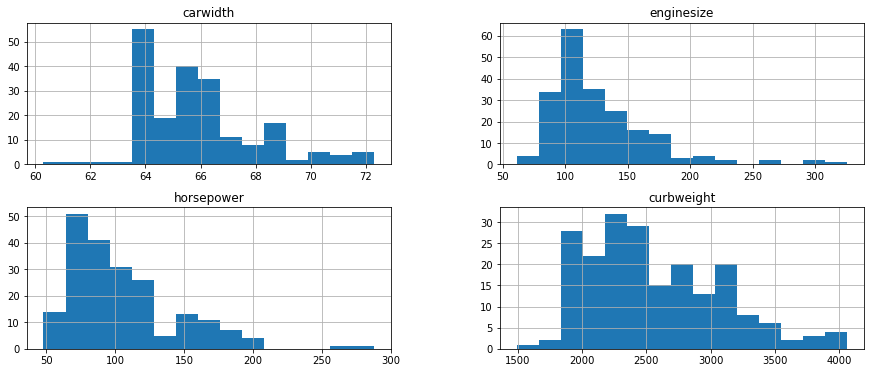

In [11]:
numerical = ["carwidth","enginesize","horsepower","curbweight"]
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 2))

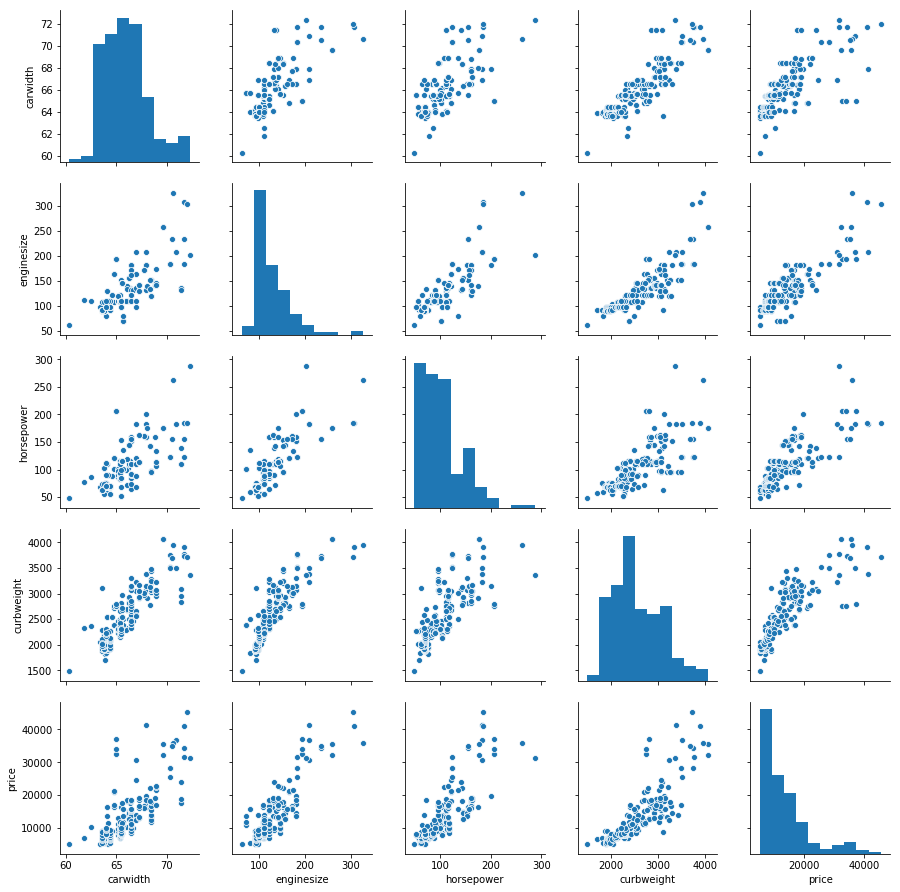

In [11]:
numerical = ["carwidth","enginesize","horsepower","curbweight","price"]
sns.pairplot(df[numerical])


C:\Users\Adib\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

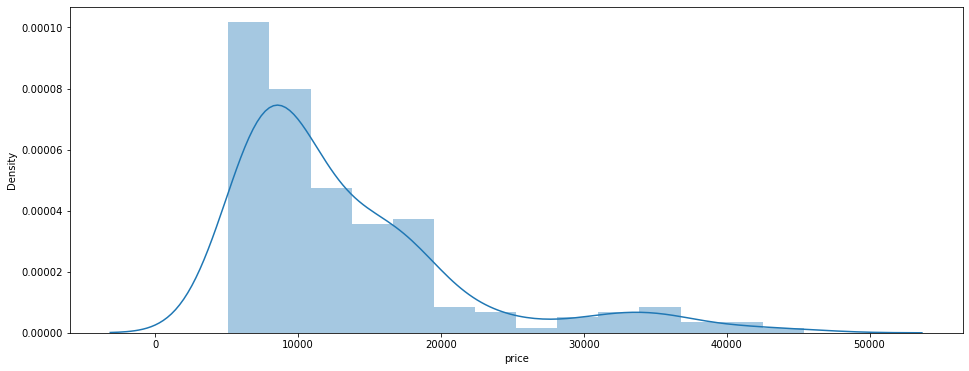

In [14]:
plt.figure(figsize=(16, 6))
sns.distplot(df["price"])

#### Visualisation des variables categoriques 

C:\Users\Adib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adib\anaconda3\lib\site-p

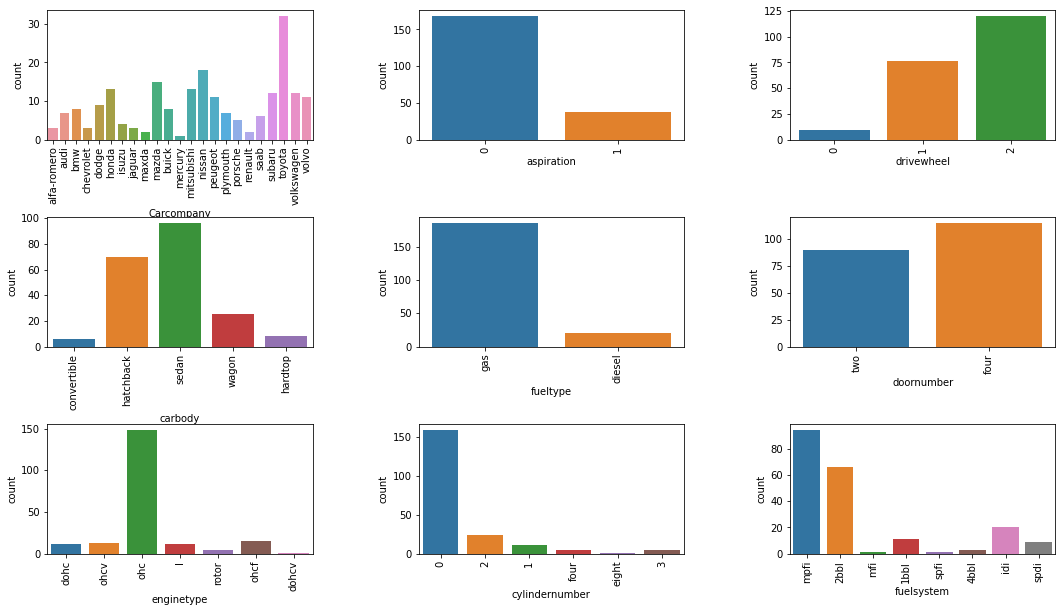

In [26]:
categorical = ["Carcompany","aspiration","drivewheel","carbody","fueltype","doornumber","enginetype","cylindernumber","fuelsystem"]
fig, ax = plt.subplots(3,3, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.subplots_adjust(left=0.2, wspace=0.4, hspace = 0.6)


#### Visualisation des tables de pivots

In [27]:
def PV(x):
	d = df.pivot_table(values='price',index=[x],columns=['price_categorie'],aggfunc =lambda x: len(x.unique()))
	return d.reindex(columns=["abordable","moyen","cher"])


<AxesSubplot:xlabel='doornumber'>

<Figure size 1440x720 with 0 Axes>

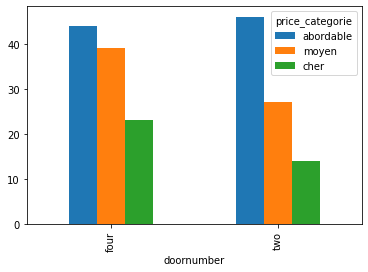

In [32]:
plt.figure(figsize=(20, 10))
PV("doornumber").plot(kind="bar")

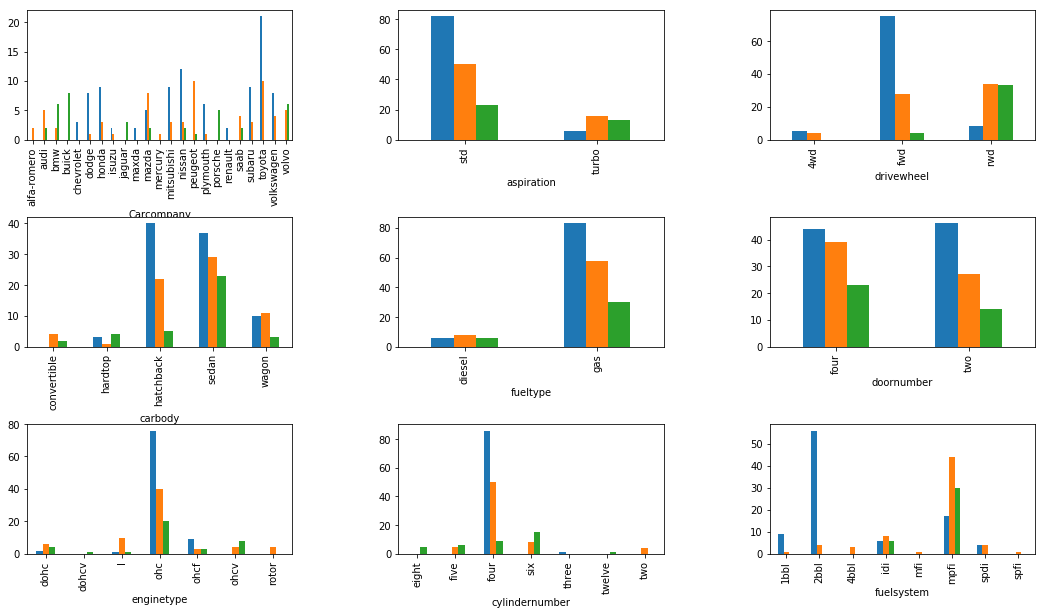

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    PV(variable).plot(kind="bar", ax=subplot,legend=None)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
fig.subplots_adjust(left=0.2, wspace=0.4, hspace = 0.6)


### 3)Construction des modèles

In [23]:
df["cylindernumber"].value_counts()


0        159
2         24
1         11
3          5
four       5
eight      1
Name: cylindernumber, dtype: int64

In [24]:
df["cylindernumber"] = df["cylindernumber"].replace(["two","three"],"four")
df["cylindernumber"] = df["cylindernumber"].replace("twelve","eight")
df["cylindernumber"].value_counts()

0        159
2         24
1         11
3          5
four       5
eight      1
Name: cylindernumber, dtype: int64

<AxesSubplot:xlabel='cylindernumber'>

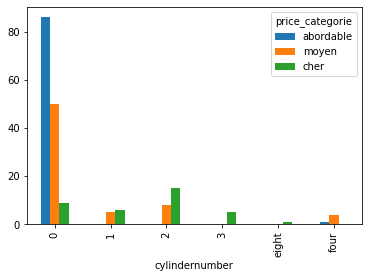

In [33]:
PV("cylindernumber").plot(kind="bar")


#### Random Forest

In [34]:
df["cylindernumber"] = df["cylindernumber"].replace({"four":0,"five":1,"six":2,"eight":3},regex=True)
df["aspiration"] = df["aspiration"].replace({"std":0,"turbo":1})
df["drivewheel"] = df["drivewheel"].replace({"4wd":0,"rwd":1,"fwd":2},regex=True)
feature_cols = ["cylindernumber","aspiration","drivewheel"]


In [51]:
X = df[feature_cols]
Y = df["price_categorie"]
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X, Y)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.268342,0.006538,0.019869,0.003322,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.780488,0.756098,0.804878,0.634146,0.512195,0.697561,0.109729,1
5,0.531748,0.032989,0.029624,0.007019,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.756098,0.756098,0.829268,0.634146,0.512195,0.697561,0.111877,2
8,0.481417,0.072801,0.029105,0.007128,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.756098,0.756098,0.829268,0.634146,0.512195,0.697561,0.111877,2
10,0.268165,0.008400,0.018828,0.000807,None,150,"{'max_depth': None, 'n_estimators': 150}",0.756098,0.756098,0.829268,0.634146,0.512195,0.697561,0.111877,2
11,0.440476,0.031529,0.024228,0.004893,None,300,"{'max_depth': None, 'n_estimators': 300}",0.756098,0.756098,0.829268,0.634146,0.512195,0.697561,0.111877,2


##### Précision final du modéle choisie

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
rf = RandomForestClassifier(n_estimators=150, max_depth=30,n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, average='weighted')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 0.185 / Predict time: 0.016 ---- Precision: 0.812 / Recall: 0.805 / Accuracy: 0.805


##### Matrice de confusion

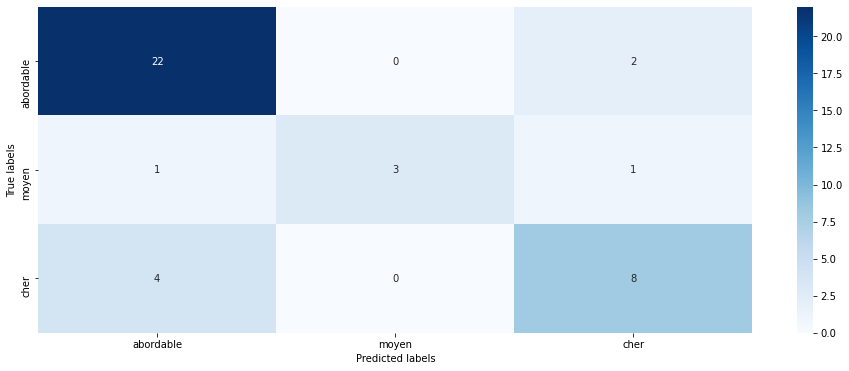

In [62]:
plt.figure(figsize=(16,6))
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="Blues")
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(["abordable","moyen","cher"]); ax.yaxis.set_ticklabels(["abordable","moyen","cher"]);


##### Variable contribuante à la constuction du modéle

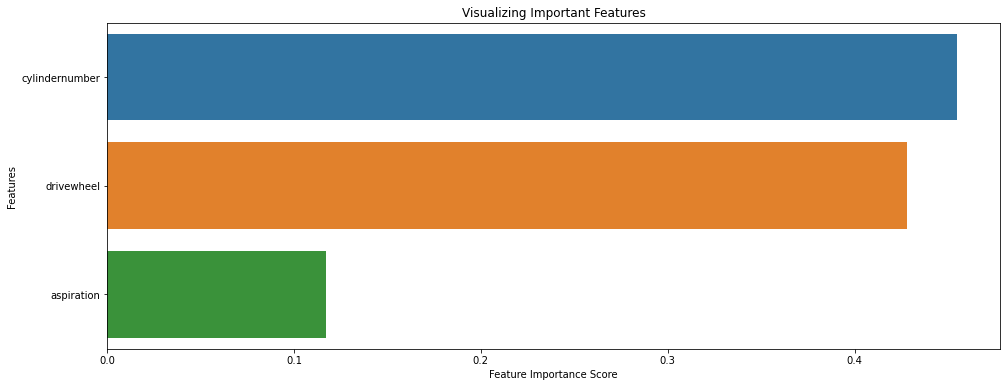

In [61]:
plt.figure(figsize=(16,6))
feature_imp = pd.Series(rf.feature_importances_,index=feature_cols).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### GradientBoost Classifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, average='weighted')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

In [49]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.919 / Recall: 0.902 / Accuracy: 0.902
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.902 / Recall: 0.902 / Accuracy: 0.902
Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.902 / Recall: 0.902 / Accuracy: 0.902
Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 0.845 / Recall: 0.829 / Accuracy: 0.829
Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.936 / Recall: 0.927 / Accuracy: 0.927
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.936 / Recall: 0.927 / Accuracy: 0.927
Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 0.845 / Recall: 0.829 / Accuracy: 0.829
Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.936 / Recall: 0.927 / Accuracy: 0.927
Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.936 / Recall: 0.927 / Accuracy: 0.927
Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.845 / Recall: 0.829 / Accuracy: 0.829
Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.936 / Recall: 0.927 / Accuracy: 0.927
Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.936 / Recall: 0.

### 4)Conclusion

Selon cette étude statistique basée essentiellement sur les types de variables numeriques et categorique, il s'avére clairement que le prix de la voiture sur le marché américain est basé principalement sur:
1. la variable numerique enginesize qui se réfère au volume total d’air et de carburant qui est poussé à travers le moteur par ses cylindres 
2. la variable numerique curbweight qui concerne le poids de la voiture avec tout l’équipement et les commodités standard, mais sans passagers, cargaison ou tout autre article chargé séparément à l’intérieur
3. la variable catégorique cylindernumber.    
Pour etre competitif sur le marché américain la société chinoise devrait maitriser le cout des elements précité à savoir le volume total d'air et de carburant poussé par le moteur, le poid de la voiture avec tout l'equipement ainsi que le nombre de cylindre du moteur sans pour autant negliger l'aspiration du moteur d'une voiture, la force du moteur ainsi que l'utilisation de la roue motrice.